In [1]:
import mglearn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
import scipy as scipy
import seaborn as sns

import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Naive Bayes classification

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()
X_full = iris_data['data']
y_full = iris_data['target']

Recalling the feature names and target names:

In [3]:
print("Features names: {}".format(iris_data['feature_names']))
print("Target names: {}".format(iris_data['target_names']))

Features names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


## The Iris data set

### Looking at the data

In particular, we wish to investigate the data relative to the naive Bayes distributional assumptions

First we divide the data conditional on the class values (here we just considwer the entire data set)

In [4]:
# Observations for setosa
X_0 = X_full[y_full==0,:]
# Observations for versicolor
X_1 = X_full[y_full==1,:]
# Observations for virginica
X_2 = X_full[y_full==2,:]

Now take a closer look at the distribution of the data. 

First for the setosa class

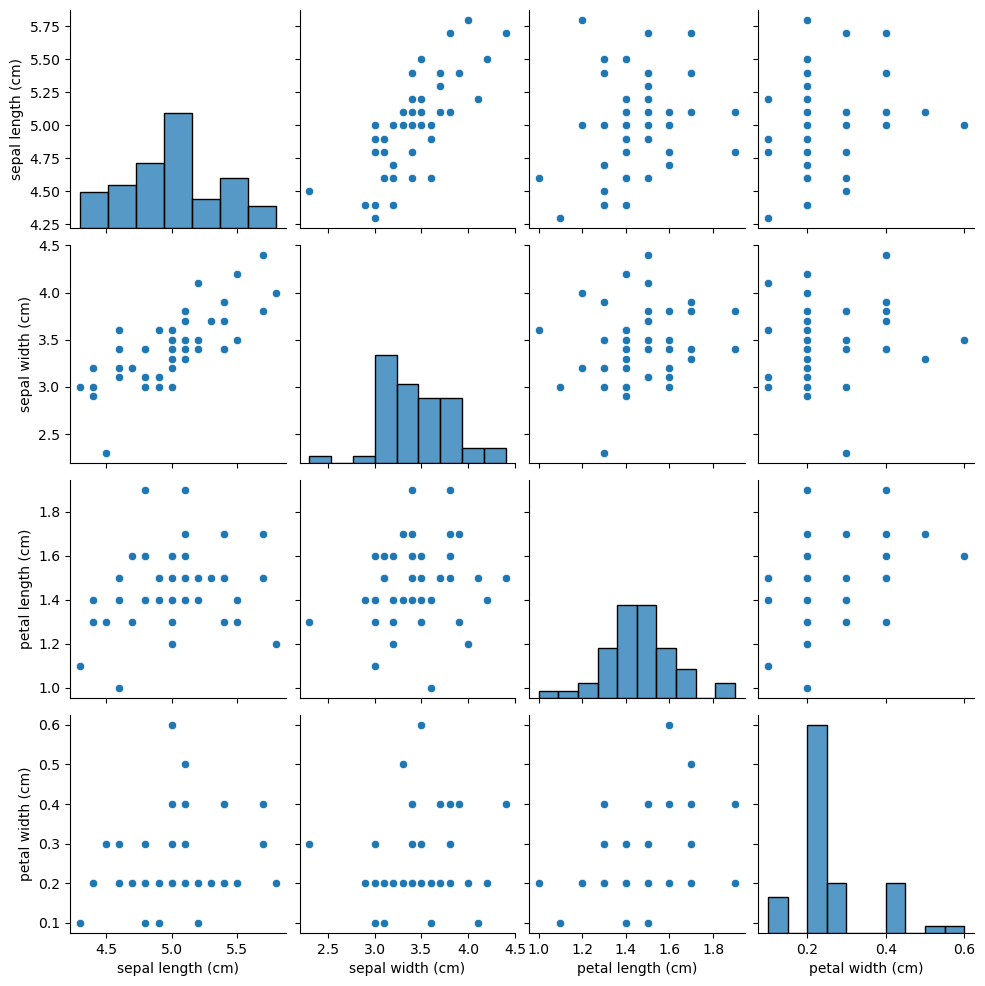

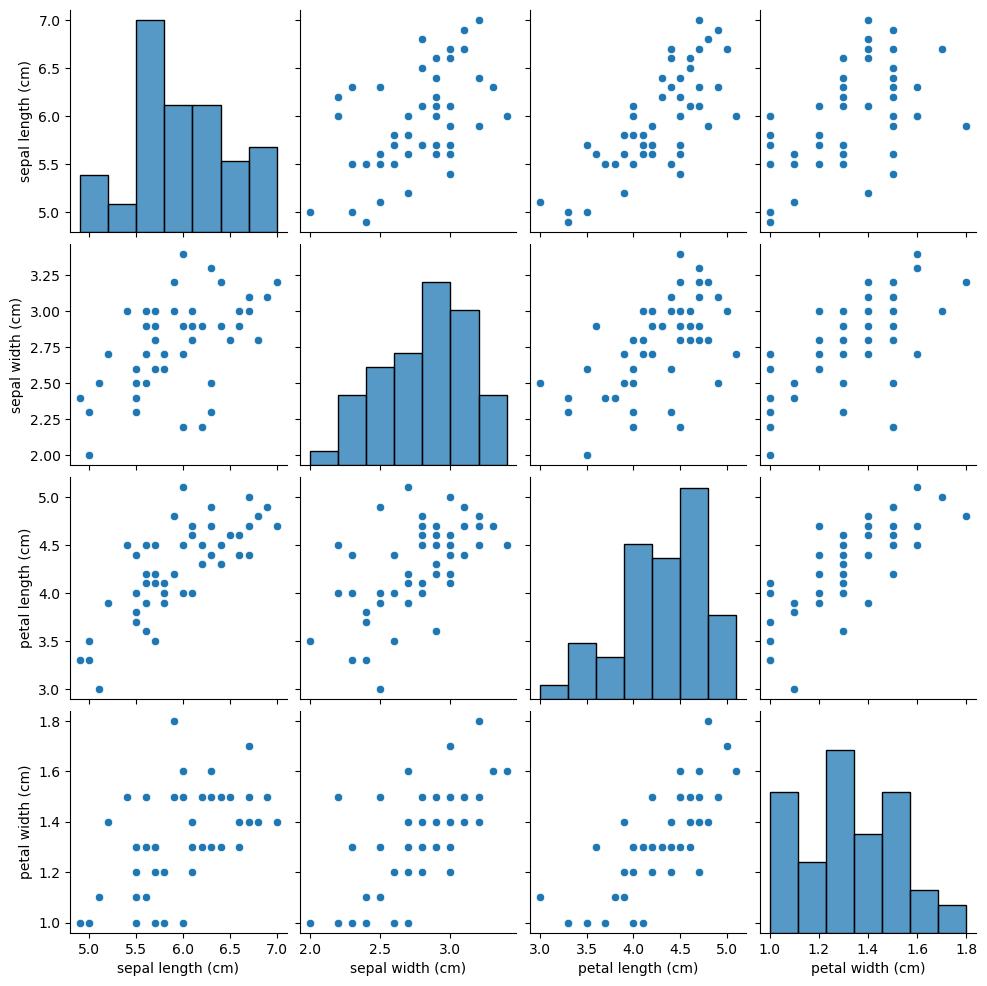

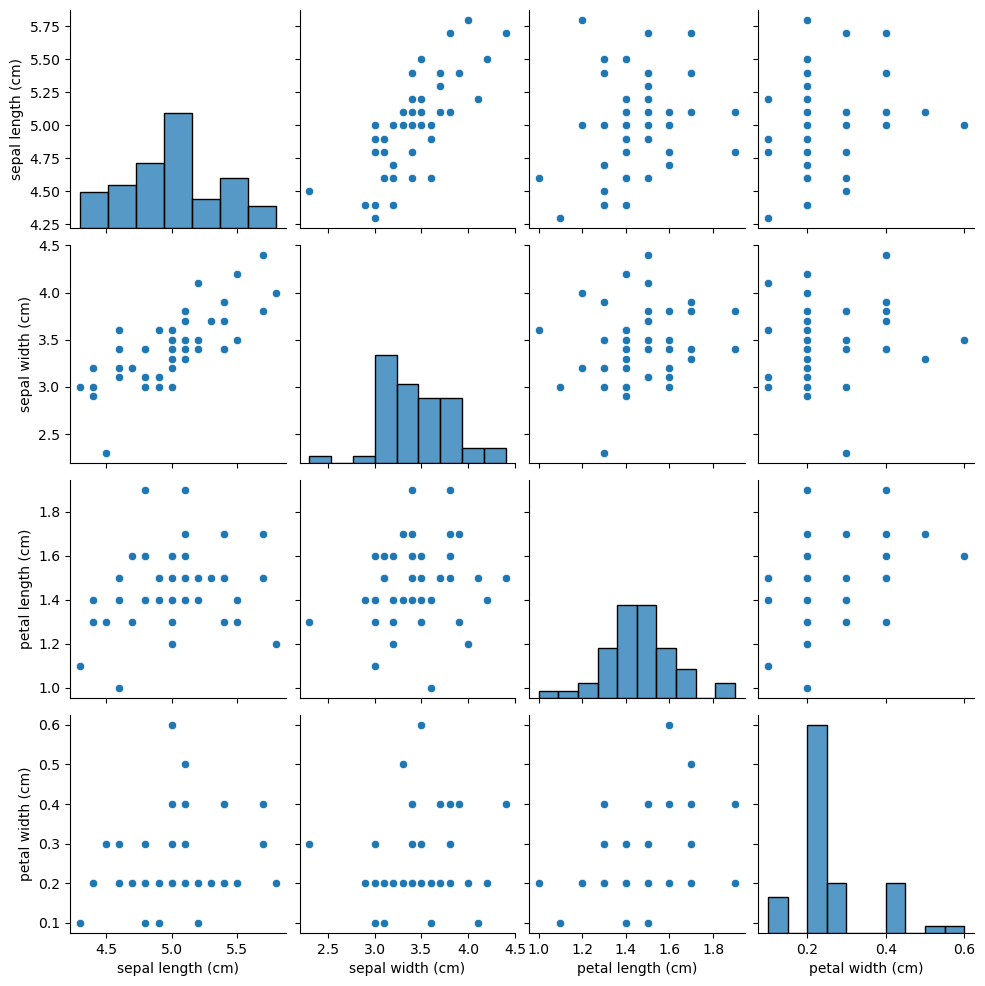

In [7]:
sns.pairplot(pd.DataFrame(X_0,columns=iris_data['feature_names']))
plt.show()

... and then for `versicolor`

In [6]:
sns.pairplot(pd.DataFrame(X_1,columns=iris_data['feature_names']))

And finally for `virginica`

In [ ]:
sns.pairplot(pd.DataFrame(X_2,columns=iris_data['feature_names']))

### Construct the model

The model is defined as a Gaussian Naive Bayes. This means that the four features are assumed to follow Gaussian distributions conditional on the class:

$$ f(x_i|y) = \frac{1}{\sqrt{2\cdot \pi\cdot \sigma_y^2}}\exp \bigg (\frac{-(x_i-\mu_y)^2}{2\cdot \sigma_y^2}\bigg )$$

In [ ]:
_mu = 0
_sigma = 1
_x = np.linspace(_mu-5*_sigma,_mu+5*_sigma, 1000)
plt.plot(_x, scipy.stats.norm.pdf(_x, _mu, _sigma))
plt.ylim(0,0.7)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

Next the model is fitted to the training data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'])
nb.fit(X_train, y_train)


### Make predicitons

For a single instance, we can make a classification and get class distribution:

In [ ]:
inst = X_test[0,:]
print("Instance to be classified: {}".format(inst))
print("Predicted class: {}".format(iris_data['target_names'][nb.predict([inst])[0]]))
print("Predicted class probabilities: {}".format(nb.predict_proba([inst])))

How well do we perform on the test set?

In [ ]:
print("Accuracy score: {}".format(nb.score(X_test, y_test)))

### Investigate the model

We can open up the model and investigate some of the learned distributions

In [ ]:
print("The learned prior distribution for the class: {}".format(nb.class_prior_))

Not surprisingly, this matches the empirical distribution in the training data:

In [ ]:
_, counts = np.unique(y_train, return_counts=True)
print("Class distribution: {}".format(counts/sum(counts)))

Looking at the features:

In [ ]:
print("The conditional variance learned by the model for the setosa class: {}".format(nb.var_[0,:]))
print("The conditional means learned by the model for the setosa class: {}".format(nb.theta_[0,:]))


Compare with the empirical distribution

In [ ]:
sns.distplot(X_0[:,0])
sns.distplot(X_0[:,1])
sns.distplot(X_0[:,2])
sns.distplot(X_0[:,3])

# Handling with binary features

For illustration we shall consider a *modified* version of the `house votes` data:

* This data set includes votes for each of the U.S. House of       Representatives Congressmen on the 16 key votes identified by the       CQA.  The CQA lists nine different types of votes: voted for, paired       for, and announced for (these three simplified to yea), voted       against, paired against, and announced against (these three       simplified to nay), voted present, voted present to avoid conflict       of interest, and did not vote or otherwise make a position known       (these three simplified to an unknown disposition).

* Attributes:
   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
   10. mx-missile: 2 (y,n)
   11. immigration: 2 (y,n)
   12. synfuels-corporation-cutback: 2 (y,n)
   13. education-spending: 2 (y,n)
   14. superfund-right-to-sue: 2 (y,n)
   15. crime: 2 (y,n)
   16. duty-free-exports: 2 (y,n)
   17. export-administration-act-south-africa: 2 (y,n)
 
* In this modified data set, missing vote values have been replaced by the most frequently occuring vote of a particular class

In [ ]:
# Load the data and replace 'y' and 'n' with 1 and o ´, respectively.
df = pd.read_csv("votes-complete.csv", sep=",")
df.replace('y',1, inplace=True)
df.replace('n',0, inplace=True)

In [ ]:
df.loc[0:20,:]

Extract the data to numpy arrays

In [ ]:
X = df.iloc[:,1:].values
y = df['Class'].values

... and split the data into training data and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Construct the model

Since we deal with binary features will will uses the model `BernoulliNB`

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nbb = BernoulliNB(alpha=1.00)
#nbb = BernoulliNB(alpha=1)

Fit the model to the training data

In [ ]:
nbb.fit(X_train,y_train)

### Make predictions

In [ ]:
print("Accuracy score: {}".format(nbb.score(X_test, y_test)))

### Investigate the model

We can open up the model and investigate some of the learned distributions

In [ ]:
print("The learned distribution for the class, P(Class): {}".format(np.exp(nbb.class_log_prior_)))

In [ ]:
print("The learned distributions for the features given Class=rep.: ")
pd.DataFrame([np.exp(nbb.feature_log_prob_[1][:])], columns=df.columns[1:].values)

In [ ]:
print("The learned distributions for the features given Class=dem.: ")
pd.DataFrame([np.exp(nbb.feature_log_prob_[0][:])], columns=df.columns[1:].values)

# Handling multinomial data

The multinomial NB is suitable for modeling discrete features representing count data such as word counts for text classification

To illustrate the model we will look at the twenty newsgroup dataset:

*The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of our knowledge, it was originally collected by Ken Lang, probably for his paper “Newsweeder: Learning to filter netnews,” though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.*

To reduce complexity we consider only 4 news groups: `categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']`

In [ ]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### Our target labels

In [ ]:
twenty_train.target_names

### First file

In [ ]:
print('\n'.join(twenty_train.data[0].split("\n")))

In [ ]:
# Target label
print(twenty_train['target_names'][twenty_train['target'][0]])

In [ ]:
print("Number of files: {}".format(len(twenty_train.data)))

### Data representation

We will use a bag of words representation, where a document is represented by the frequency with which the different words appear in the text. (Data is stored as a sparse matrix.)

Tokenize the text and (possibly) remove stopwords:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

In [ ]:
# Index of the word 'to'
count_vect.vocabulary_.get(u'to')

In [ ]:
# The number of times 'to' appears in document '0'
X_train_counts[0,32493]

Longer documents will have higher count values than shorter documents even if they concern the same topic. We avoid this problem by dividing the number of occurences of a word by the number of words in the document.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

## Training our classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf, twenty_train.target)

## Prediction

In [ ]:
docs_new = ['God is love', 'OpenGL on the GPU is fast', 'Data science is fun']
X_new_counts = count_vect.transform(docs_new)
X_new_tf = tf_transformer.transform(X_new_counts)

In [ ]:
predicted = clf.predict(X_new_tf)

In [ ]:
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))